In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A20E-6E0F

 Directory of C:\Users\Naku\Desktop\books\zindi hackerthon\umojahack-africa-2022-intermediate-challenge

03/19/2022  12:39 PM    <DIR>          .
03/19/2022  12:39 PM    <DIR>          ..
03/19/2022  04:40 AM    <DIR>          .ipynb_checkpoints
03/19/2022  04:47 AM           141,916 Baseline.csv
03/19/2022  12:39 PM           114,488 challenge 2.ipynb
03/18/2022  07:04 AM               793 DataDictionary.csv
03/18/2022  07:04 AM         4,069,463 policies.csv
03/18/2022  07:04 AM            72,358 SampleSubmission.csv
03/18/2022  07:04 AM           534,268 test.csv
03/18/2022  07:04 AM         1,312,345 train.csv
03/19/2022  04:40 AM           230,003 Zimnat_starternotebook.ipynb
               8 File(s)      6,475,634 bytes
               3 Dir(s)  270,930,964,480 bytes free


In [4]:
#loading data
dataInfo = pd.read_csv('DataDictionary.csv')
policy = pd.read_csv('policies.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

In [5]:
#viewing the data
dataInfo.head()

,Policy Data,Unnamed: 1
0,Columns,Data type
1,policy number,Unique policy identifier
2,product code,product code
3,trans date,date of policy transaction
4,from date,first date of policy cover


In [6]:
policy.head()

,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch
0,pol000006995,prod00033,2017-07-01 08:24:55.800,2017-07-01 00:00:00.000,2018-07-01 00:00:00.000,ag00005,cob00035,ct0001,rf0002,br00002
1,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00009,ct0003,rf0001,br00006
2,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00031,ct0003,rf0001,br00006
3,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00031,ct0003,rf0001,br00002
4,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00009,ct0003,rf0001,br00002


In [7]:
policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30371 entries, 0 to 30370
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   policy_number      30371 non-null  object
 1   product_code       30371 non-null  object
 2   trans_date         30371 non-null  object
 3   from_date          30371 non-null  object
 4   to_date            30371 non-null  object
 5   agent              30371 non-null  object
 6   class_of_business  30325 non-null  object
 7   client_type        30371 non-null  object
 8   renewal_frequency  30371 non-null  object
 9   branch             30371 non-null  object
dtypes: object(10)
memory usage: 1.2+ MB


FOCUSSING ON THE TRAIN DATA--VISUALISATION AND ANALYSIS

In [8]:
train.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.0,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.00
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.0,prod00005,ag00226,cob00010,rt00032,2018-05-13,ct0003,rf0001,pc0007,sc00023,br00002,3780.24
2,ID_NYHI7WJGGIAE,pol000006135,claim0004147,3000.0,prod00029,ag00037,cob00010,rt00026,2018-08-18,ct0003,rf0001,pc0007,sc00024,br00002,2196.50
3,ID_ROMMDCXYUXN5,pol000008991,claim0009962,6000.0,prod00005,ag00037,cob00009,rt00032,2018-12-20,ct0003,rf0001,pc0007,sc00021,br00001,105.67
4,ID_2OTD9NX8L73D,pol000007768,claim0007346,26850.0,prod00015,ag00226,cob00034,rt00023,2018-11-07,ct0001,rf0001,pc0007,sc00021,br00001,1605.64


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   claim_id           9376 non-null   object 
 1   policy_number      9290 non-null   object 
 2   claim_number       9376 non-null   object 
 3   sum_insured        9376 non-null   float64
 4   product            9376 non-null   object 
 5   agent              9376 non-null   object 
 6   class_of_business  9376 non-null   object 
 7   risk_type          9376 non-null   object 
 8   loss_date          9376 non-null   object 
 9   client_type        9376 non-null   object 
 10  renewal_frequency  9376 non-null   object 
 11  primary_cause      9376 non-null   object 
 12  secondary_cause    9376 non-null   object 
 13  branch             9376 non-null   object 
 14  target             9376 non-null   float64
dtypes: float64(2), object(13)
memory usage: 622.7+ KB


In [10]:
train.isnull().sum()

claim_id              0
policy_number        86
claim_number          0
sum_insured           0
product               0
agent                 0
class_of_business     0
risk_type             0
loss_date             0
client_type           0
renewal_frequency     0
primary_cause         0
secondary_cause       0
branch                0
target                0
dtype: int64

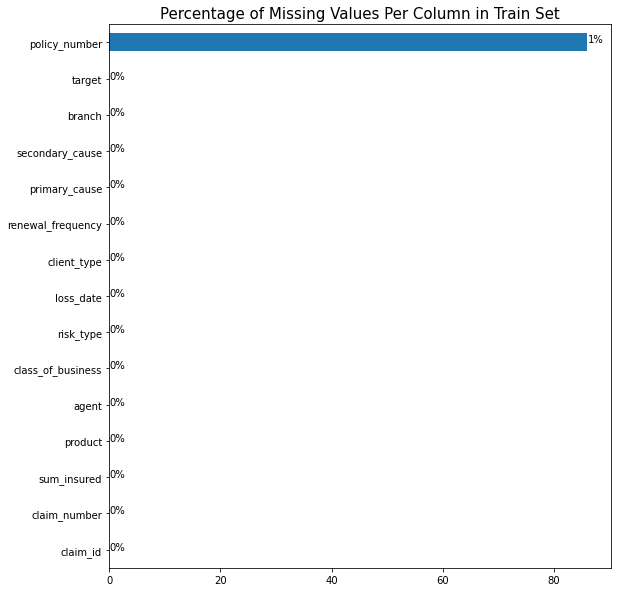

In [11]:
# Plot missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [12]:
#checking for duplications
train.duplicated().sum()

0

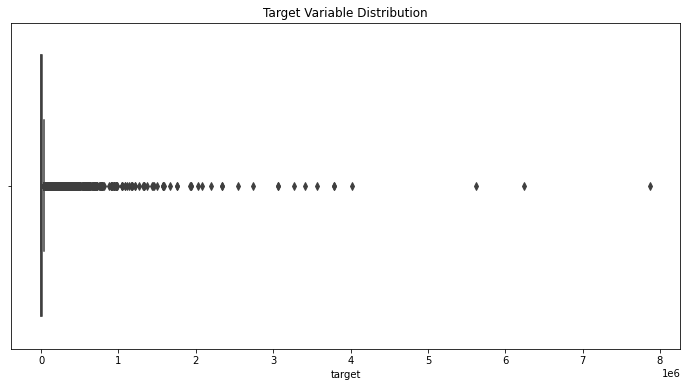

In [13]:
# A box plot showing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(train.target)
plt.title('Target Variable Distribution');

In [14]:
#removing outliers
import numpy as np


# IQR
Q1 = np.percentile(train['target'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(train['target'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", train.shape)
 
# Upper bound
upper = np.where(train['target'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(train['target'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
train.drop(upper[0], inplace = True)
train.drop(lower[0], inplace = True)
test.drop(upper[0], inplace = True)
test.drop(lower[0], inplace = True)
 
print("New Shape: ", train.shape)

Old Shape:  (9376, 15)


KeyError: '[4036 4041 4050 4053 4054 4056 4061 4064 4068 4069 4078 4085 4087 4089\n 4090 4093 4094 4105 4116 4119 4121 4124 4142 4153 4159 4163 4164 4172\n 4176 4180 4195 4196 4205 4208 4210 4217 4219 4228 4235 4239 4241 4245\n 4251 4259 4262 4264 4272 4285 4293 4299 4305 4306 4324 4325 4327 4329\n 4331 4338 4341 4344 4350 4361 4362 4365 4371 4373 4391 4398 4407 4415\n 4419 4424 4425 4434 4435 4436 4441 4446 4464 4468 4469 4478 4490 4521\n 4522 4536 4540 4543 4549 4554 4556 4557 4562 4567 4572 4583 4588 4608\n 4609 4615 4627 4631 4639 4644 4645 4650 4656 4657 4662 4663 4665 4667\n 4675 4705 4718 4721 4735 4742 4748 4749 4767 4773 4777 4786 4793 4796\n 4809 4819 4832 4848 4859 4860 4862 4864 4865 4868 4893 4898 4900 4915\n 4916 4919 4921 4931 4933 4939 4940 4942 4945 4947 4960 4964 4973 4984\n 4993 5003 5007 5015 5025 5026 5033 5044 5058 5067 5080 5086 5095 5117\n 5118 5129 5137 5138 5139 5142 5146 5153 5162 5181 5182 5184 5194 5199\n 5203 5207 5219 5248 5249 5255 5257 5264 5270 5284 5291 5294 5297 5300\n 5310 5314 5320 5325 5328 5334 5337 5339 5340 5341 5345 5349 5367 5380\n 5382 5387 5388 5391 5399 5406 5407 5408 5410 5413 5421 5423 5424 5438\n 5439 5440 5445 5450 5452 5454 5474 5480 5482 5484 5492 5494 5505 5516\n 5518 5526 5531 5533 5539 5542 5543 5548 5552 5553 5565 5568 5572 5573\n 5580 5591 5596 5600 5601 5602 5604 5609 5611 5613 5617 5629 5636 5640\n 5642 5653 5664 5673 5678 5685 5695 5703 5715 5716 5718 5728 5738 5741\n 5742 5744 5745 5754 5755 5771 5785 5792 5799 5807 5822 5823 5828 5840\n 5842 5843 5846 5850 5851 5852 5862 5863 5865 5869 5872 5882 5883 5894\n 5896 5901 5908 5910 5930 5939 5958 5959 5961 5965 5969 5976 6004 6018\n 6021 6030 6038 6040 6056 6057 6059 6088 6091 6097 6100 6108 6109 6118\n 6124 6142 6150 6154 6155 6162 6176 6183 6187 6192 6195 6197 6211 6217\n 6226 6234 6235 6237 6250 6251 6252 6254 6255 6256 6259 6274 6278 6286\n 6288 6297 6317 6326 6328 6348 6352 6360 6363 6373 6374 6379 6401 6404\n 6407 6411 6413 6426 6429 6434 6439 6451 6452 6456 6477 6483 6484 6499\n 6503 6529 6542 6555 6564 6566 6568 6582 6584 6600 6607 6609 6614 6631\n 6635 6653 6657 6674 6679 6685 6690 6704 6708 6710 6717 6722 6726 6731\n 6737 6741 6757 6762 6771 6777 6790 6799 6805 6812 6815 6816 6826 6833\n 6836 6846 6847 6869 6873 6879 6882 6892 6895 6906 6910 6912 6915 6926\n 6928 6938 6943 6956 6958 6959 6965 6967 6975 6983 6991 6995 6998 7003\n 7009 7015 7018 7033 7039 7040 7042 7055 7060 7063 7072 7073 7075 7085\n 7092 7105 7116 7117 7122 7137 7139 7146 7147 7152 7157 7165 7178 7179\n 7187 7190 7192 7196 7206 7213 7218 7220 7221 7229 7237 7249 7259 7265\n 7266 7268 7271 7278 7308 7311 7314 7348 7350 7354 7355 7358 7362 7369\n 7370 7374 7392 7396 7397 7398 7401 7410 7415 7422 7433 7449 7451 7463\n 7471 7487 7498 7502 7503 7506 7508 7516 7519 7520 7529 7530 7534 7535\n 7537 7548 7551 7552 7561 7579 7581 7587 7591 7593 7598 7600 7615 7622\n 7623 7624 7628 7629 7642 7644 7652 7655 7672 7679 7682 7693 7700 7702\n 7705 7713 7721 7742 7743 7744 7747 7750 7767 7772 7777 7778 7781 7786\n 7791 7795 7797 7799 7807 7821 7824 7827 7830 7837 7843 7850 7852 7855\n 7858 7870 7871 7875 7878 7919 7921 7923 7924 7934 7936 7941 7946 7949\n 7950 7957 7961 7972 7975 7979 7981 7984 7991 7998 8000 8003 8006 8012\n 8017 8030 8042 8046 8061 8065 8074 8082 8083 8106 8111 8112 8113 8114\n 8116 8122 8124 8131 8135 8142 8148 8152 8157 8164 8179 8182 8187 8191\n 8195 8199 8201 8207 8210 8215 8220 8221 8225 8226 8232 8241 8242 8249\n 8259 8263 8271 8283 8284 8292 8299 8312 8313 8319 8327 8328 8329 8337\n 8343 8346 8347 8351 8352 8357 8366 8373 8376 8386 8400 8404 8405 8422\n 8424 8428 8429 8435 8439 8453 8454 8462 8464 8470 8472 8477 8489 8502\n 8510 8512 8515 8531 8534 8537 8539 8544 8547 8552 8558 8569 8583 8586\n 8599 8600 8605 8607 8616 8630 8633 8655 8656 8662 8667 8668 8683 8686\n 8689 8690 8691 8695 8696 8709 8712 8720 8727 8728 8730 8735 8741 8742\n 8748 8749 8750 8751 8753 8766 8768 8778 8785 8789 8793 8797 8805 8813\n 8835 8837 8838 8843 8850 8851 8860 8861 8866 8872 8877 8878 8899 8902\n 8903 8911 8914 8915 8936 8954 8958 8959 8964 8971 8973 8979 8980 8982\n 8991 8999 9008 9032 9040 9042 9046 9049 9054 9056 9058 9061 9064 9069\n 9075 9076 9077 9089 9098 9099 9108 9115 9143 9144 9148 9158 9160 9165\n 9166 9169 9170 9188 9190 9192 9193 9200 9209 9219 9224 9246 9250 9256\n 9268 9286 9305 9316 9319 9325 9328 9331 9335 9356 9368] not found in axis'

In [ ]:
# Convert datetime variables to datetime objects
train.loss_date = pd.to_datetime(train.loss_date, errors='coerce')

# Confirm that the dates have been converted successfully 
train.loss_date.describe()

In [ ]:
# Convert categorical variables to categorical objects
cat_cols = train.columns.difference(['claim_id', 'loss_date', 'sum_insured', 'target']).tolist()

# Preview categorical variables
train[cat_cols].head()

In [115]:
# Fill in missing values in categorical variables with the most common
train[cat_cols] = train[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Convert
for col in cat_cols:
  train[col] = train[col].astype('category')

# Confirm
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7873 entries, 1 to 9375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   claim_id           7873 non-null   object  
 1   policy_number      7873 non-null   category
 2   claim_number       7873 non-null   category
 3   sum_insured        7873 non-null   float64 
 4   product            7873 non-null   category
 5   agent              7873 non-null   category
 6   class_of_business  7873 non-null   category
 7   risk_type          7873 non-null   category
 8   loss_date          7873 non-null   object  
 9   client_type        7873 non-null   category
 10  renewal_frequency  7873 non-null   category
 11  primary_cause      7873 non-null   category
 12  secondary_cause    7873 non-null   category
 13  branch             7873 non-null   category
 14  target             7873 non-null   float64 
dtypes: category(11), float64(2), object(2)
memory usage: 78

In [116]:
# Extract day, month and year from the loss date column
# day
train['loss_date_day'] = train.loss_date.dt.day

# month
train['loss_date_month'] = train.loss_date.dt.month
 
# year
train['loss_date_year'] = train.loss_date.dt.year

# Preview engineered date features
train[['loss_date', 'loss_date_day', 'loss_date_month', 'loss_date_year']].head()# Extract day, month and year from the loss date column
# day
train['loss_date_day'] = train.loss_date.dt.day

# month
train['loss_date_month'] = train.loss_date.dt.month
 
# year
train['loss_date_year'] = train.loss_date.dt.year

# Preview engineered date features
train[['loss_date', 'loss_date_day', 'loss_date_month', 'loss_date_year']].head()

AttributeError: Can only use .dt accessor with datetimelike values

In [117]:
# Loss month countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'loss_date_month', data = train)
plt.title('Loss month count plot')
plt.show()

ValueError: Could not interpret input 'loss_date_month'

<Figure size 1008x504 with 0 Axes>

In [ ]:
# Loss year countplot
plt.figure(figsize = (10, 5))
sns.countplot(x = 'loss_date_year', data = train)
plt.title('Loss year count plot')
plt.show()

In [ ]:
plt.figure(figsize = (14, 5))
sns.boxplot(x = 'branch', y = 'sum_insured', data = train)
plt.title('Branch Vs Suminsured boxplots')
plt.show()

In [ ]:
# Label encode categorical variables
for col in cat_cols:
  # Instantiate Labelencoder
  le = LabelEncoder()
  train[col] = le.fit_transform(train[col])

# Preview engineered train dataset
train.head()


Preproccessing test data

In [ ]:
# Convert datetime variables to datetime objects
test.loss_date = pd.to_datetime(test.loss_date, errors='coerce')

# Fill in missing values in categorical variables with the most common
test[cat_cols] = test[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Convert
for col in cat_cols:
  test[col] = test[col].astype('category')

# Extract day, month and year from the loss date column
test['loss_date_day'] = test.loss_date.dt.day #day

test['loss_date_month'] = test.loss_date.dt.month #month
 
test['loss_date_year'] = test.loss_date.dt.year #year

# Label encode categorical variables
for col in cat_cols:
  # Instantiate Labelencoder
  le = LabelEncoder()
  test[col] = le.fit_transform(test[col])

# Preview engineered test dataset
test.head()

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import 

In [61]:
S = StandardScaler()

In [62]:
S.fit_transform(test)

TypeError: invalid type promotion

In [ ]:
test.drop("claim_id",axis = 0)

In [ ]:
corr_test = train.copy()
correlation = corr_test.corr()
correlation['target'].sort_values(ascending = False)

In [ ]:
main_cols = train.columns.difference(['claim_id', 'loss_date', 'target','client_type','risk_type','policy_number','claim_number','branch','agent','sum_insured','secondary_cause','loss_date_day']).tolist()

In [ ]:
X = train[main_cols]
y = train.target

In [ ]:
X

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled = scale.fit_transform(X)

In [ ]:
scaled

In [ ]:
column_header = ['loss_date_month','loss_date_year','product','agent','class_of_business','renewal_frequency']

In [ ]:
x = pd.DataFrame(scaled,columns =column_header )

In [ ]:
x

In [ ]:
corr_test = x.copy()
correlation = corr_test.corr()
correlation['target'].sort_values(ascending = False)


Modelling 

In [ ]:
# Select main columns to be used in training



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the MAE score of the model
print(f'LinearRegression MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

In [ ]:
X.info()

In [ ]:
# Make prediction on the test set
test_df = test[main_cols]
predictions = model.predict(test_df)

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.target = predictions

# Check the distribution of your predictions
plt.figure(figsize=(12, 6))
sns.boxplot(sub_file.target)
plt.title('Predictions Data Distribution');

In [ ]:
# Preview the sub_file
sub_file.head()

In [ ]:
# Write to csv file to submit to Zindi
sub_file.to_csv("Baseline.csv", index = False)